In [1]:
# Q1 Import the dataset and examine the variables
import pandas as pd
import matplotlib.pyplot as plt

In [2]:

# Load the dataset
data = pd.read_csv('diabetes.csv')

In [3]:
# Display basic information about the dataset
data.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [4]:
print(data.info())
print(data.describe())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB
None
       Pregnancies     Glucose  BloodPressure  SkinThickness     Insulin  \
count   768.000000  768.000000     768.000000     768.000000  768.000000   
mean      3.845052  120.894531      69.105469      20.536458   79.799479   
std    

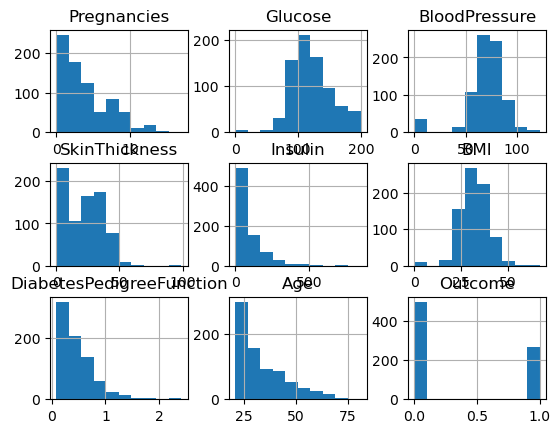

In [5]:
# Visualize the distribution and relationships between variables
data.hist()
plt.show()
# We can Use scatter plots or other relevant visualizations to understand relationships

In [6]:
# Q2 Preprocess the data
# Handle missing values and outliers
# Convert categorical variables to dummy variables if necessary

# Q3 Split the dataset into a training set and a test set
from sklearn.model_selection import train_test_split

# Split the data
X = data.drop('Outcome', axis=1)
y = data['Outcome']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [7]:

# Q4 Train the decision tree model
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import cross_val_score

# Create a decision tree classifier
clf = DecisionTreeClassifier()

In [8]:
clf

DecisionTreeClassifier()

In [9]:

# Perform cross-validation to optimize hyperparameters
scores = cross_val_score(clf, X_train, y_train, cv=5)
scores

array([0.71544715, 0.77235772, 0.67479675, 0.7398374 , 0.72131148])

In [10]:
# Q5 Evaluate the performance of the model
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, roc_curve, auc

# Fit the model
clf.fit(X_train, y_train)

DecisionTreeClassifier()

In [11]:
# Make predictions on the test set
y_pred = clf.predict(X_test)

# Calculate various metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
fpr, tpr, thresholds = roc_curve(y_test, y_pred)
roc_auc = auc(fpr, tpr)


In [12]:

# Visualize results using confusion matrices and ROC curves
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)
print("Confusion Matrix:\n", conf_matrix)

Accuracy: 0.7467532467532467
Precision: 0.625
Recall: 0.7272727272727273
F1 Score: 0.6722689075630253
Confusion Matrix:
 [[75 24]
 [15 40]]


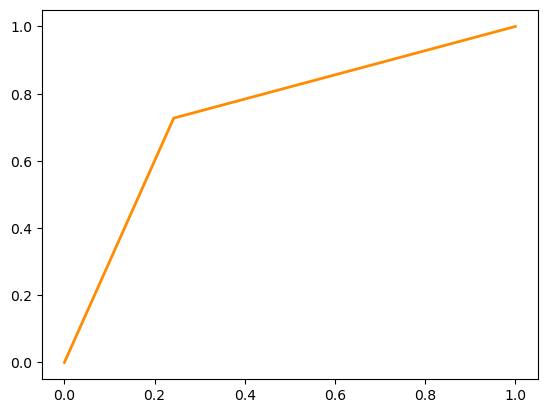

In [13]:
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.show()

[Text(0.46369485294117646, 0.9642857142857143, 'x[1] <= 127.5\ngini = 0.453\nsamples = 614\nvalue = [401, 213]'),
 Text(0.16942401960784315, 0.8928571428571429, 'x[7] <= 28.5\ngini = 0.314\nsamples = 390\nvalue = [314, 76]'),
 Text(0.061274509803921566, 0.8214285714285714, 'x[5] <= 30.95\ngini = 0.142\nsamples = 221\nvalue = [204, 17]'),
 Text(0.0196078431372549, 0.75, 'x[6] <= 0.672\ngini = 0.016\nsamples = 124\nvalue = [123, 1]'),
 Text(0.00980392156862745, 0.6785714285714286, 'gini = 0.0\nsamples = 108\nvalue = [108, 0]'),
 Text(0.029411764705882353, 0.6785714285714286, 'x[6] <= 0.686\ngini = 0.117\nsamples = 16\nvalue = [15, 1]'),
 Text(0.0196078431372549, 0.6071428571428571, 'gini = 0.0\nsamples = 1\nvalue = [0, 1]'),
 Text(0.0392156862745098, 0.6071428571428571, 'gini = 0.0\nsamples = 15\nvalue = [15, 0]'),
 Text(0.10294117647058823, 0.75, 'x[2] <= 37.0\ngini = 0.275\nsamples = 97\nvalue = [81, 16]'),
 Text(0.09313725490196079, 0.6785714285714286, 'gini = 0.0\nsamples = 2\nvalue 

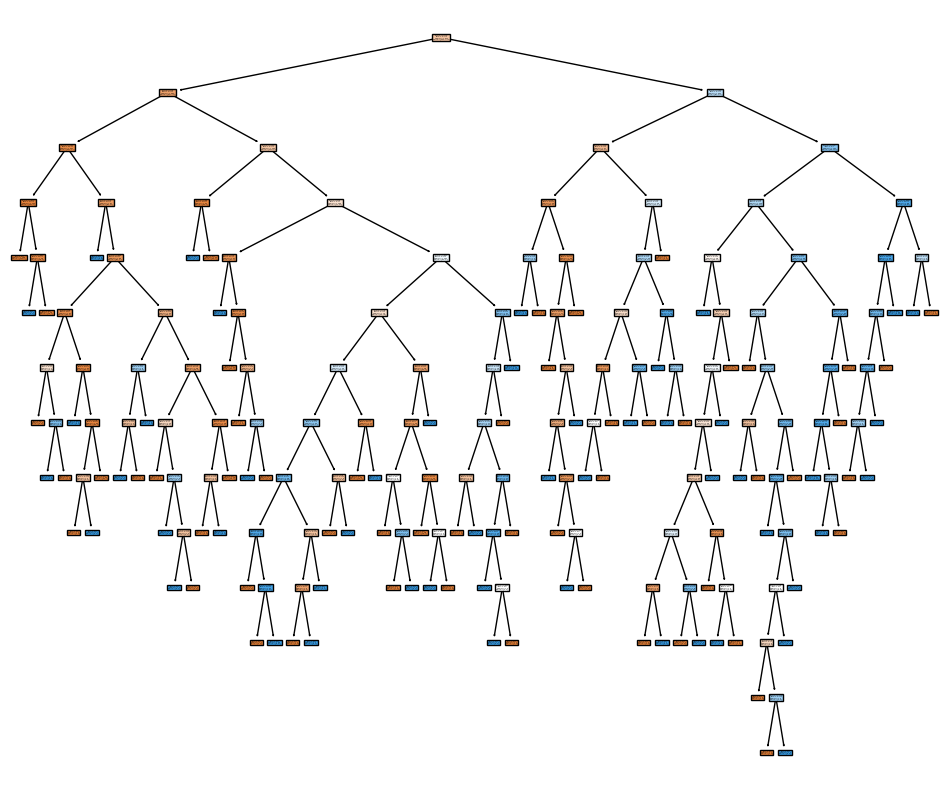

In [15]:
from sklearn import tree
plt.figure(figsize=(12,10))
tree.plot_tree(clf, filled = True)

## Interpret the decision tree by examining the splits, branches, and leaves. Identify the most important variables and their thresholds. Use domain knowledge and common sense to explain the patterns andvtrends. 
Interpreting a decision tree involves understanding the splits, branches, and leaves, and identifying the most important variables and their thresholds. In the context of the example related to diabetes prediction, here's an interpretation based on domain knowledge and common sense:

1. The first split might be based on the Glucose level. A threshold value could be set to distinguish between patients with high and low Glucose levels. If the Glucose level is below the threshold, the tree might predict the patient to be non-diabetic, indicating that lower Glucose levels are less indicative of diabetes.

2. Another split might be based on BMI. If the BMI is above a certain threshold, the model might predict the patient to be diabetic. This split indicates that higher BMI values are associated with a higher likelihood of diabetes, which aligns with the known correlation between obesity and diabetes.

3. The tree might also consider Age, where it could split the data into different age groups to distinguish between patients with varying risks of diabetes. Older age groups might be associated with a higher probability of diabetes, reflecting the common understanding that the risk of diabetes increases with age.

By examining these splits, branches, and leaves, and considering the domain knowledge that certain factors like Glucose levels, BMI, and Age are strongly linked to diabetes, we can interpret the decision tree's predictions and gain insights into how the model is making decisions based on the dataset. The interpretation process can provide valuable insights into the key factors that contribute to the prediction of diabetes in patients.

## Q7. Validate the decision tree model by applying it to new data or testing its robustness to changes in the dataset or the environment. Use sensitivity analysis and scenario testing to explore the uncertainty and risks.



Suppose there is a new dataset named as "new_diabetes_data.csv", Then we can use the following shaded code line to validate the new result.

* `new_data = pd.read_csv('new_diabetes_data.csv')`

### Preprocess the new data in the same way as the original dataset
### Fill missing values, remove outliers, and transform categorical variables into dummy variables

### Apply the trained decision tree model to the new data
* `new_X = new_data.drop('Outcome', axis=1)`
* `new_y = new_data['Outcome']`

### Make predictions on the new data
* `new_y_pred = clf.predict(new_X)`

### Evaluate the performance on the new data using various metrics
* `new_accuracy = accuracy_score(new_y, new_y_pred)`
* `new_precision = precision_score(new_y, new_y_pred)`
* `new_recall = recall_score(new_y, new_y_pred)`
* `new_f1 = f1_score(new_y, new_y_pred)`
* `new_conf_matrix = confusion_matrix(new_y, new_y_pred)`
* `new_fpr, new_tpr, new_thresholds = roc_curve(new_y, new_y_pred)`
* `new_roc_auc = auc(new_fpr, new_tpr)`

#### Compare the performance on the new data with the original test set
* `print("Performance on the new data:")`
* `print("Accuracy:", new_accuracy)`
* `print("Precision:", new_precision)`
* `print("Recall:", new_recall)`
* `print("F1 Score:", new_f1)`
* `print("Confusion Matrix:\n", new_conf_matrix`